# Practica 5

In [44]:
from deap import creator, tools, base, algorithms
import numpy as np
import random


class Tren:
    def __init__(self, numero_vagones, operacion, matricula):
        self.numero_vagones = numero_vagones
        self.operacion = operacion
        self.matricula = matricula

    def __str__(self):
        return "Número de vagones: " + str(self.numero_vagones) + "\n" + \
        "Muelle de operaciones: " + str(self.operacion) + "\n" + \
                "Matrícula: " + str(self.matricula) + "\n"

    


def producir_lista_trenes_aleatoria(n, min_vagones, max_vagones):
    lista_trenes = []
    for i in range(n):
        numero_vagones = random.randint(min_vagones, max_vagones)
        operacion = random.choice(["gas", "carbón", "contenedores"])
        lista_trenes.append(Tren(numero_vagones, operacion, i))
    return lista_trenes


def crear_cola_de_trenes(lista_de_trenes):
    auxiliar = lista_de_trenes
    random.shuffle(auxiliar)
    return auxiliar


class Cola_de_trenes(list):
    def __init__(self, lista_de_trenes, create = True):
        if create:
            list.extend(self,crear_cola_de_trenes(lista_de_trenes))
        else:
            list.extend(self, lista_de_trenes)

    def __str__(self):
        cadena = ""
        for i in list(self):
            cadena += (str(i) + "\n")
        return cadena

random.seed(2024)

In [45]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create("Individual", Cola_de_trenes, fitness=creator.FitnessMin)

C:\Users\Usuario\PycharmProjects\vent\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Usuario\PycharmProjects\vent\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [46]:
toolbox = base.Toolbox()

# Crear individuos
toolbox.register("individual", creator.Individual, producir_lista_trenes_aleatoria(50, 10, 30))


toolbox.register("individual_mate", creator.Individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [47]:

def tiempo_total(indiv):
    sum = 0 
    for tren in indiv:
        sum += tren.numero_vagones

    return sum


def evaluar_cola(individuo):
    
    muelle_gas = 1
    muelle_carbon = 1
    muelle_contenedores = 1
    id_tren = 0

    
    for i in range(tiempo_total(individuo)):
        muelle_gas -= 1
        muelle_carbon -= 1
        muelle_contenedores -= 1
        
        if id_tren >= len(individuo) and muelle_carbon <= 0 and muelle_contenedores <= 0 and muelle_gas <= 0:
            break
        
        for _ in range(3):
            
            if id_tren >= len(individuo):
                break

            if individuo[id_tren].operacion == "carbón" and muelle_carbon <= 0:
                muelle_carbon = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
            if individuo[id_tren].operacion == "contenedores" and muelle_contenedores <= 0:
                muelle_contenedores = individuo[id_tren].numero_vagones
                id_tren += 1
                continue
                
            if individuo[id_tren].operacion == "gas" and muelle_gas <= 0:
                muelle_gas = individuo[id_tren].numero_vagones
                id_tren += 1
                continue

        continue
    return i,


In [48]:
def train_swap(indivuduo, indpb):
    if random.random() < indpb:
        pos1 = random.randint(0, len(indivuduo) - 1)
        pos2 = random.randint(0, len(indivuduo) - 1)
        
        train1 = indivuduo[pos1]
        train2 = indivuduo[pos2]
        indivuduo[pos1] = train2
        indivuduo[pos2] = train1
        
    return indivuduo,

In [49]:
from copy import deepcopy

def trains_mate(indv1, indv2):
    cut = random.randint(0, len(indv1) - 1)
    
    f_half_new_invd1 = indv1[:cut]
    f_half_new_invd2 = indv1[cut:]
    
    l_half_new_invd1 = deepcopy(indv2)
    l_half_new_invd2 = []
    
    for train1 in f_half_new_invd1:
        for train2 in indv2:
            if train1.matricula == train2.matricula:
                for i, t in enumerate(l_half_new_invd1):
                    if train1.matricula == t.matricula:
                        l_half_new_invd1.pop(i)
                        l_half_new_invd2.append(train2)
    
    new_indv1 = f_half_new_invd1 + l_half_new_invd1
    new_indv2 = f_half_new_invd2 + l_half_new_invd2
    
    return toolbox.individual_mate(new_indv1, False), toolbox.individual_mate(new_indv2, False)

(Más adelante se prueban distintas opciones para los hiperparámetros de las siguientes funciones para buscar los mejores individuos. La solución que se muestra a continuación es la que consideramos mejor, la llamaremos Solución 1.)

# Solución 1

In [66]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

In [67]:
ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

In [68]:
poblacion = toolbox.population(n=100)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.5, mutpb=0.2, ngen=75, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	100   	542.77  	628	445
1  	58    	514.73  	595	440
2  	62    	496.72  	560	420
3  	61    	478.93  	541	420
4  	72    	460.95  	503	420
5  	51    	448.96  	487	420
6  	57    	444.33  	494	420
7  	58    	437.32  	492	414
8  	55    	432.5   	487	414
9  	62    	430.16  	486	414
10 	53    	426.38  	472	410
11 	72    	425.65  	453	400
12 	57    	420.98  	449	400
13 	64    	416.32  	452	400
14 	56    	411.86  	443	400
15 	68    	408.76  	445	400
16 	57    	405.72  	426	400
17 	61    	405.32  	428	393
18 	61    	403.46  	426	393
19 	58    	402.56  	422	393
20 	65    	401.98  	431	392
21 	62    	401.54  	428	391
22 	50    	398.9   	426	391
23 	62    	398.16  	423	391
24 	65    	395.9   	416	391
25 	55    	395.62  	418	391
26 	66    	396.05  	416	391
27 	60    	394.98  	416	391
28 	53    	393.65  	416	391
29 	53    	393.53  	433	389
30 	57    	394.16  	433	389
31 	58    	394.75  	433	389
32 	45    	393.93  	412	389
33 	58    	394.59  	417	389
34 	45    	392.74  	

In [70]:
print(f'El mejor individuo es \n {ranking[0]} con aptitud {ranking[0].fitness}')

El mejor individuo es 
 Número de vagones: 29
Muelle de operaciones: gas
Matrícula: 8

Número de vagones: 20
Muelle de operaciones: contenedores
Matrícula: 10

Número de vagones: 23
Muelle de operaciones: contenedores
Matrícula: 3

Número de vagones: 17
Muelle de operaciones: gas
Matrícula: 34

Número de vagones: 19
Muelle de operaciones: contenedores
Matrícula: 9

Número de vagones: 17
Muelle de operaciones: carbón
Matrícula: 48

Número de vagones: 16
Muelle de operaciones: gas
Matrícula: 27

Número de vagones: 24
Muelle de operaciones: gas
Matrícula: 42

Número de vagones: 16
Muelle de operaciones: contenedores
Matrícula: 44

Número de vagones: 23
Muelle de operaciones: contenedores
Matrícula: 7

Número de vagones: 20
Muelle de operaciones: carbón
Matrícula: 41

Número de vagones: 27
Muelle de operaciones: gas
Matrícula: 15

Número de vagones: 14
Muelle de operaciones: carbón
Matrícula: 43

Número de vagones: 18
Muelle de operaciones: contenedores
Matrícula: 4

Número de vagones: 20


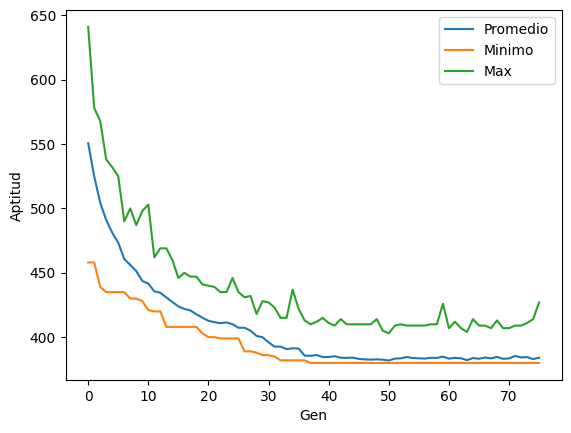

In [54]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()

# Cambios en los hiperparámetros

En las siguientes celdas de código se prueban distintas configuraciones de los hiperparámetros para buscar otras opciones.



**Configuración 1**

*Cambios respecto a la solución 1*

-Número de generaciones: Antes 75 / Ahora 40
-Probabilidad de cruce: Antes 0.5 / Ahora 0.7
-Tamaño de la población: Antes 100 / Ahora 500

In [55]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

poblacion = toolbox.population(n=500)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.7, mutpb=0.2, ngen=40, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	500   	549.074 	662	435
1  	381   	514.982 	613	422
2  	369   	490.71  	581	416
3  	384   	474.968 	605	416
4  	358   	461.328 	538	414
5  	397   	450.268 	516	405
6  	384   	440.89  	517	405
7  	384   	431.666 	512	403
8  	382   	425.858 	480	404
9  	394   	423.222 	490	400
10 	368   	419.704 	494	390
11 	379   	418.61  	485	390
12 	388   	415.892 	482	389
13 	386   	415.878 	481	389
14 	383   	412.924 	491	388
15 	369   	408.87  	467	387
16 	372   	405.458 	454	383
17 	374   	401.608 	441	381
18 	383   	399.858 	461	382
19 	400   	398.678 	437	381
20 	394   	396.692 	438	381
21 	399   	395.828 	430	380
22 	376   	394.566 	444	380
23 	371   	393.71  	435	380
24 	392   	392.938 	442	380
25 	379   	392.204 	439	380
26 	361   	390.268 	431	380
27 	397   	389.838 	458	380
28 	379   	387.84  	435	380
29 	365   	387.06  	436	380
30 	376   	387.206 	442	380
31 	373   	386.986 	430	380
32 	389   	386.74  	433	380
33 	381   	387.132 	418	380
34 	393   	387.374 	

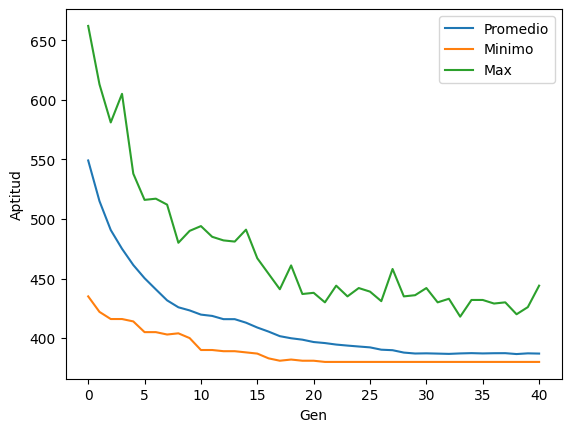

In [56]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()

**Conclusion**

Con esta configuración el algoritmo es más lento, pero haya la solución óptima (t = 380). Y los máximos de las generaciones son algo mayores.

**Configuración 2**

*Cambios respecto a la solución 1*

-Número de generaciones: Antes 75 / Ahora 40
-Probabilidad de mutación: Antes 0.03 / Ahora 0.2
-Probabilidad de mutación de un individuo: Antes 0.2 / Ahora 0.5
-Probabilidad de cruce: Antes 0.5 / Ahora 0.2
-Tamaño de la población: Antes 100 / Ahora 50

In [57]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.2)

ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

poblacion = toolbox.population(n=50)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.2, mutpb=0.5, ngen=40, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	50    	558.84  	635	487
1  	33    	522.06  	559	487
2  	26    	504.02  	534	487
3  	27    	490.84  	514	479
4  	26    	486.88  	500	479
5  	30    	486.48  	523	479
6  	31    	485.34  	527	464
7  	27    	482.24  	526	471
8  	31    	479.76  	525	458
9  	29    	478.7   	497	458
10 	33    	475.52  	521	458
11 	31    	468.72  	505	442
12 	27    	460.92  	499	442
13 	23    	456.76  	479	442
14 	30    	452.82  	472	442
15 	32    	450.48  	494	435
16 	34    	447.08  	477	435
17 	25    	443.5   	475	435
18 	35    	441.86  	471	435
19 	28    	440.44  	493	434
20 	26    	437.56  	478	413
21 	29    	435.24  	457	413
22 	30    	436.84  	476	413
23 	28    	429     	465	413
24 	31    	424.52  	454	413
25 	33    	419.2   	456	413
26 	35    	416.96  	455	413
27 	30    	415.12  	447	406
28 	30    	413.56  	436	406
29 	37    	415.08  	456	406
30 	34    	413.28  	459	406
31 	28    	409.8   	458	406
32 	27    	408.7   	430	406
33 	34    	409.72  	443	406
34 	27    	409.9   	

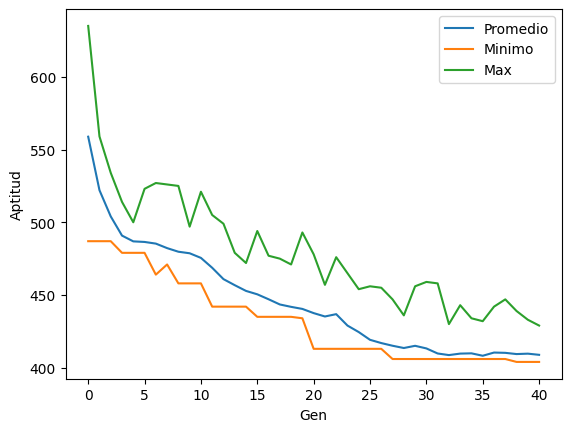

In [58]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()

**Conclusion**

Esta configuración es mucho más rápida, pero no haya la solución óptima del problema, aunque da una solución bastante buena.

**Configuración 3**

*Cambios respecto a la solución 1*

-Número de generaciones: Antes 75 / Ahora 5
-Probabilidad de cruce: Antes 0.5 / Ahora 1.0
-Tamaño de la población: Antes 100 / Ahora 1000
-Tamaño del Torneo: Antes 3 / Ahora 5

In [59]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=5)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

poblacion = toolbox.population(n=1000)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=1.0, mutpb=0.2, ngen=5, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	1000  	545.205 	693	435
1  	1000  	505.882 	594	435
2  	1000  	483.042 	578	417
3  	1000  	468.589 	550	414
4  	1000  	455.533 	560	404
5  	1000  	445.973 	527	404


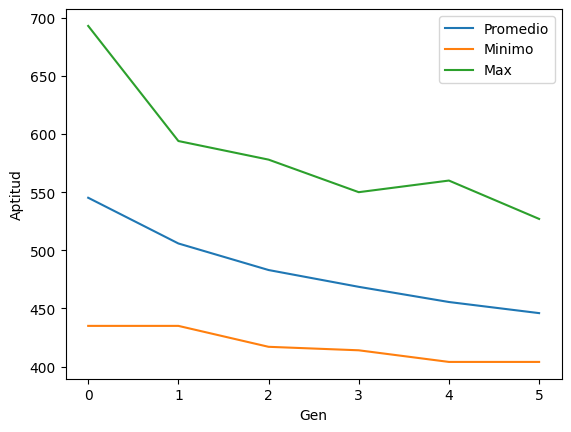

In [60]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()

**Conclusion**

El promedio, el máximo y el mínimo están bastante alejados. Cada generación tarda mucho en procesarse porque son 1000 individuos. No da con la mejor solución, pero no es una mala opción.

**Configuración 4**

*Cambios respecto a la solución 1*

-Número de generaciones: Antes 75 / Ahora 200
-Probabilidad de cruce: Antes 0.5 / Ahora 0.3
-Probabilidad de mutación de un individuo: Antes 0.2 / Ahora 0.5
-Tamaño de la población: Antes 100 / Ahora 10
-Tamaño Hall of Fame: Antes 5 / Ahora 10

In [61]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.03)

ranking = tools.HallOfFame(10)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

poblacion = toolbox.population(n=10)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.3, mutpb=0.5, ngen=200, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	10    	548.7   	621	485
1  	10    	525.3   	538	485
2  	6     	506.2   	527	468
3  	5     	495     	527	468
4  	7     	475     	511	468
5  	9     	468     	468	468
6  	3     	468     	468	468
7  	3     	468.4   	472	468
8  	6     	469.9   	487	468
9  	5     	469     	478	468
10 	2     	469.3   	481	468
11 	7     	468     	468	468
12 	6     	468     	468	468
13 	5     	473     	492	468
14 	6     	468     	468	468
15 	8     	468     	468	468
16 	7     	468     	468	468
17 	6     	470.5   	487	468
18 	6     	469.7   	489	464
19 	4     	467.2   	468	464
20 	7     	466     	468	464
21 	8     	464.5   	471	462
22 	7     	463.2   	464	462
23 	6     	462.2   	464	462
24 	8     	464.8   	490	462
25 	5     	461.3   	462	455
26 	9     	469.6   	489	462
27 	9     	468.2   	479	462
28 	6     	466.4   	503	462
29 	8     	467.3   	479	462
30 	8     	467.7   	487	459
31 	8     	463.8   	491	455
32 	6     	460.4   	483	455
33 	10    	458.1   	473	455
34 	6     	456.1   	

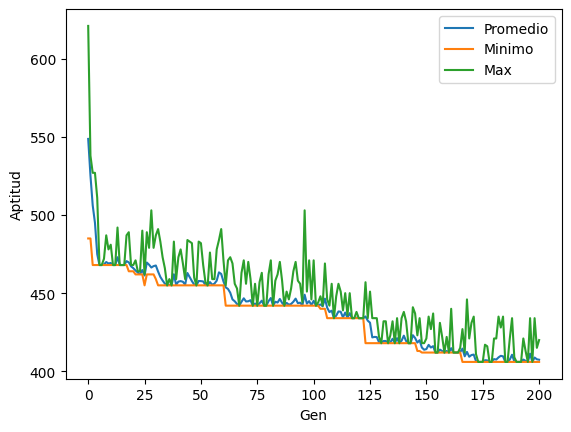

In [62]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()

**Conclusion**

Es muy rápido, es la solución que da la peor solución hasta ahora y los máximos en las generaciones tienen muchos picos mientras que los mínimos bajan gradualmente.

**Configuración 5**

*Cambios respecto a la solución 1*

-Número de generaciones: Antes 75 / Ahora 30
-Probabilidad de cruce: Antes 0.5 / Ahora 0.8
-Probabilidad de mutación: Antes 0.03 / Ahora 0.5
-Probabilidad de mutación de un individuo: Antes 0.2 / Ahora 0.8
-Tamaño de la población: Antes 100 / Ahora 25
-Tamaño del Torneo: Antes 3 / Ahora 10

In [63]:
toolbox.register("evaluate", evaluar_cola)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("mate", trains_mate)
toolbox.register("mutate", train_swap, indpb=0.5)

ranking = tools.HallOfFame(5)
estadisticas = tools.Statistics(lambda indiv: indiv.fitness.values)
estadisticas.register("promedio", np.mean)
estadisticas.register("max", np.max)
estadisticas.register("min", np.min)

poblacion = toolbox.population(n=25)
pop, logbook = algorithms.eaSimple(poblacion, toolbox, cxpb=0.8, mutpb=0.8, ngen=30, stats=estadisticas, halloffame=ranking, verbose=True)

gen	nevals	promedio	max	min
0  	25    	552.4   	629	491
1  	24    	511.32  	553	474
2  	24    	490.8   	539	438
3  	25    	474.88  	527	436
4  	25    	452     	494	435
5  	23    	442.68  	480	433
6  	23    	444.12  	486	433
7  	25    	440.8   	493	423
8  	24    	439.76  	483	421
9  	23    	432.04  	463	421
10 	23    	429     	460	410
11 	24    	428.76  	449	410
12 	24    	424.88  	463	408
13 	24    	419     	455	403
14 	24    	415.08  	460	403
15 	23    	412.56  	441	403
16 	21    	416.36  	448	403
17 	20    	417.24  	464	403
18 	22    	414.12  	445	403
19 	23    	410.28  	434	402
20 	23    	411.32  	439	398
21 	23    	414.84  	464	398
22 	23    	409.64  	444	398
23 	23    	403.24  	435	396
24 	24    	410.6   	458	396
25 	24    	406.2   	430	396
26 	25    	404.68  	439	392
27 	21    	408.4   	443	387
28 	25    	406.6   	459	387
29 	25    	406.72  	455	387
30 	25    	404.28  	432	387


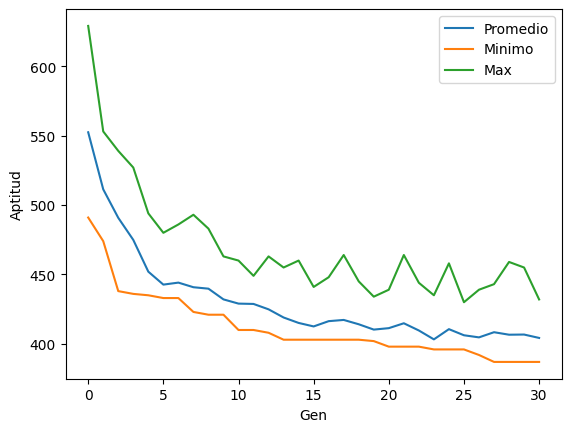

In [64]:
import matplotlib.pyplot as plt

gen, prom, min, max = logbook.select("gen", "promedio", "min", "max")

plt.plot(gen, prom, label="Promedio")
plt.plot(gen, min, label="Minimo")
plt.plot(gen, max, label="Max")
plt.xlabel("Gen")
plt.ylabel("Aptitud")
plt.legend(loc="upper right")
plt.show()

**Conclusion**

No llega a la solución óptima pero llega a una decente. Es muy rápido y los máximos tienen algunos repuntes. 